# Statistical Disclosure Attack

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from src import attack, evaluation, plotting, utils
from src.dataset import Dataset, chating, simulation
from src.experiment import run_experiments

In [2]:
# Define the dimensions of the problem
# N: number of senders (senders/receivers)
# K: number of contacts per sender
# M: number of observations
# B: batch size (number of observations per batch)
N = 100
K = 5
M = 1000
B = 10

seed = 42

torch_params = {'batch_size': 64, 'epochs': 250, 'lr': 1e-4, 'early_stop': 5, 'use_tqdm': False,
                'device': 'cuda' if torch.cuda.is_available() else 'cpu'}
print(f"Using torch device: {torch_params['device']}")

Using torch device: cuda


## Lineare Gleichungsystem

### Simulated Data

In [3]:
sim_data = simulation.get_dataset(N, B, M, K, seed, gen_messages=simulation.gen_messages_normal, gen_sender_behavior_params={'exact_contacts': False})
P_true, X, Y = sim_data
print(sim_data.describe())

n_user=(100, 100), n_observations=1000, batch_size=10


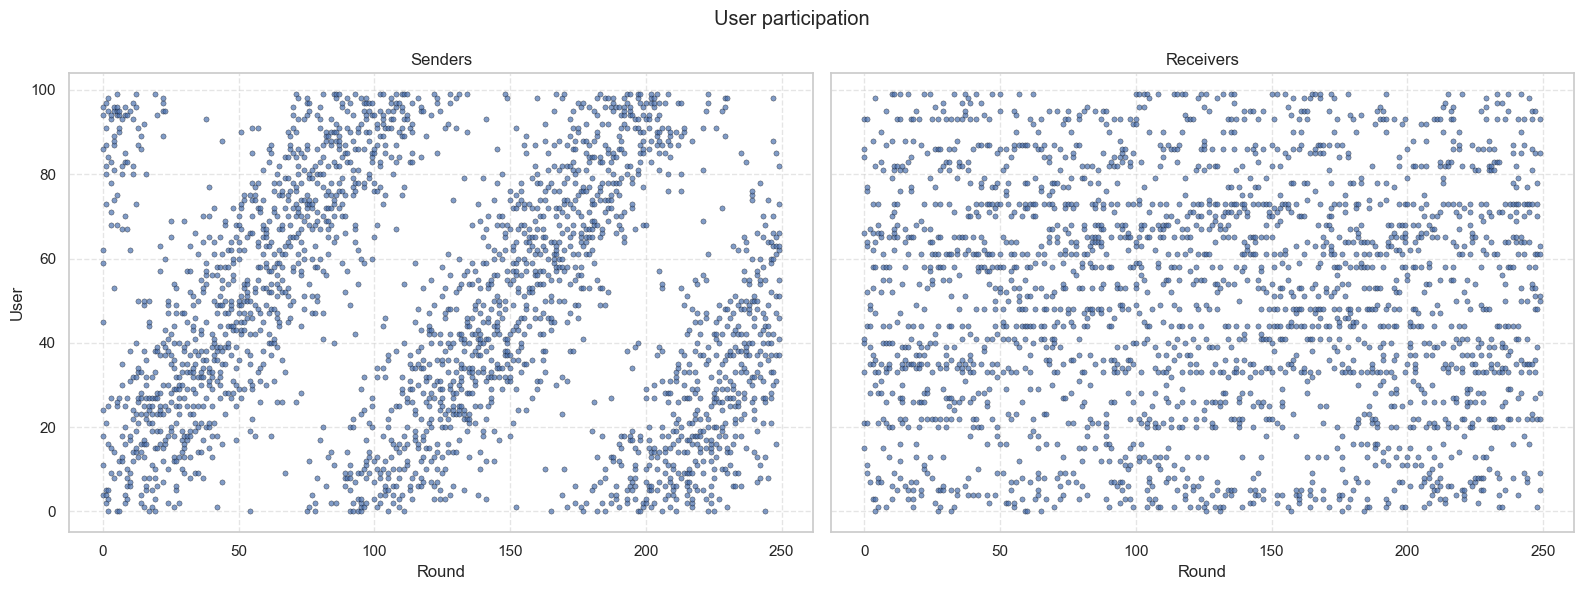

In [4]:
n_rounds = 250
fig, axs = plotting.plot_user_participation(X[:n_rounds], Y[:n_rounds])
plt.savefig('assets/simulated/user_participation.pdf')
plt.show()

In [5]:
# Model parameters
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(LinearRegression()),
           attack.TorchAttack(attack.Transformer(num_users=sim_data.n_user),
                              train_params=torch_params)
]

results_sim = run_experiments(sim_data, attacks, step=sim_data.n_observations//25, repeat=5)

Observation Rounds: 100%|██████████| 25/25 [18:51<00:00, 45.28s/round]


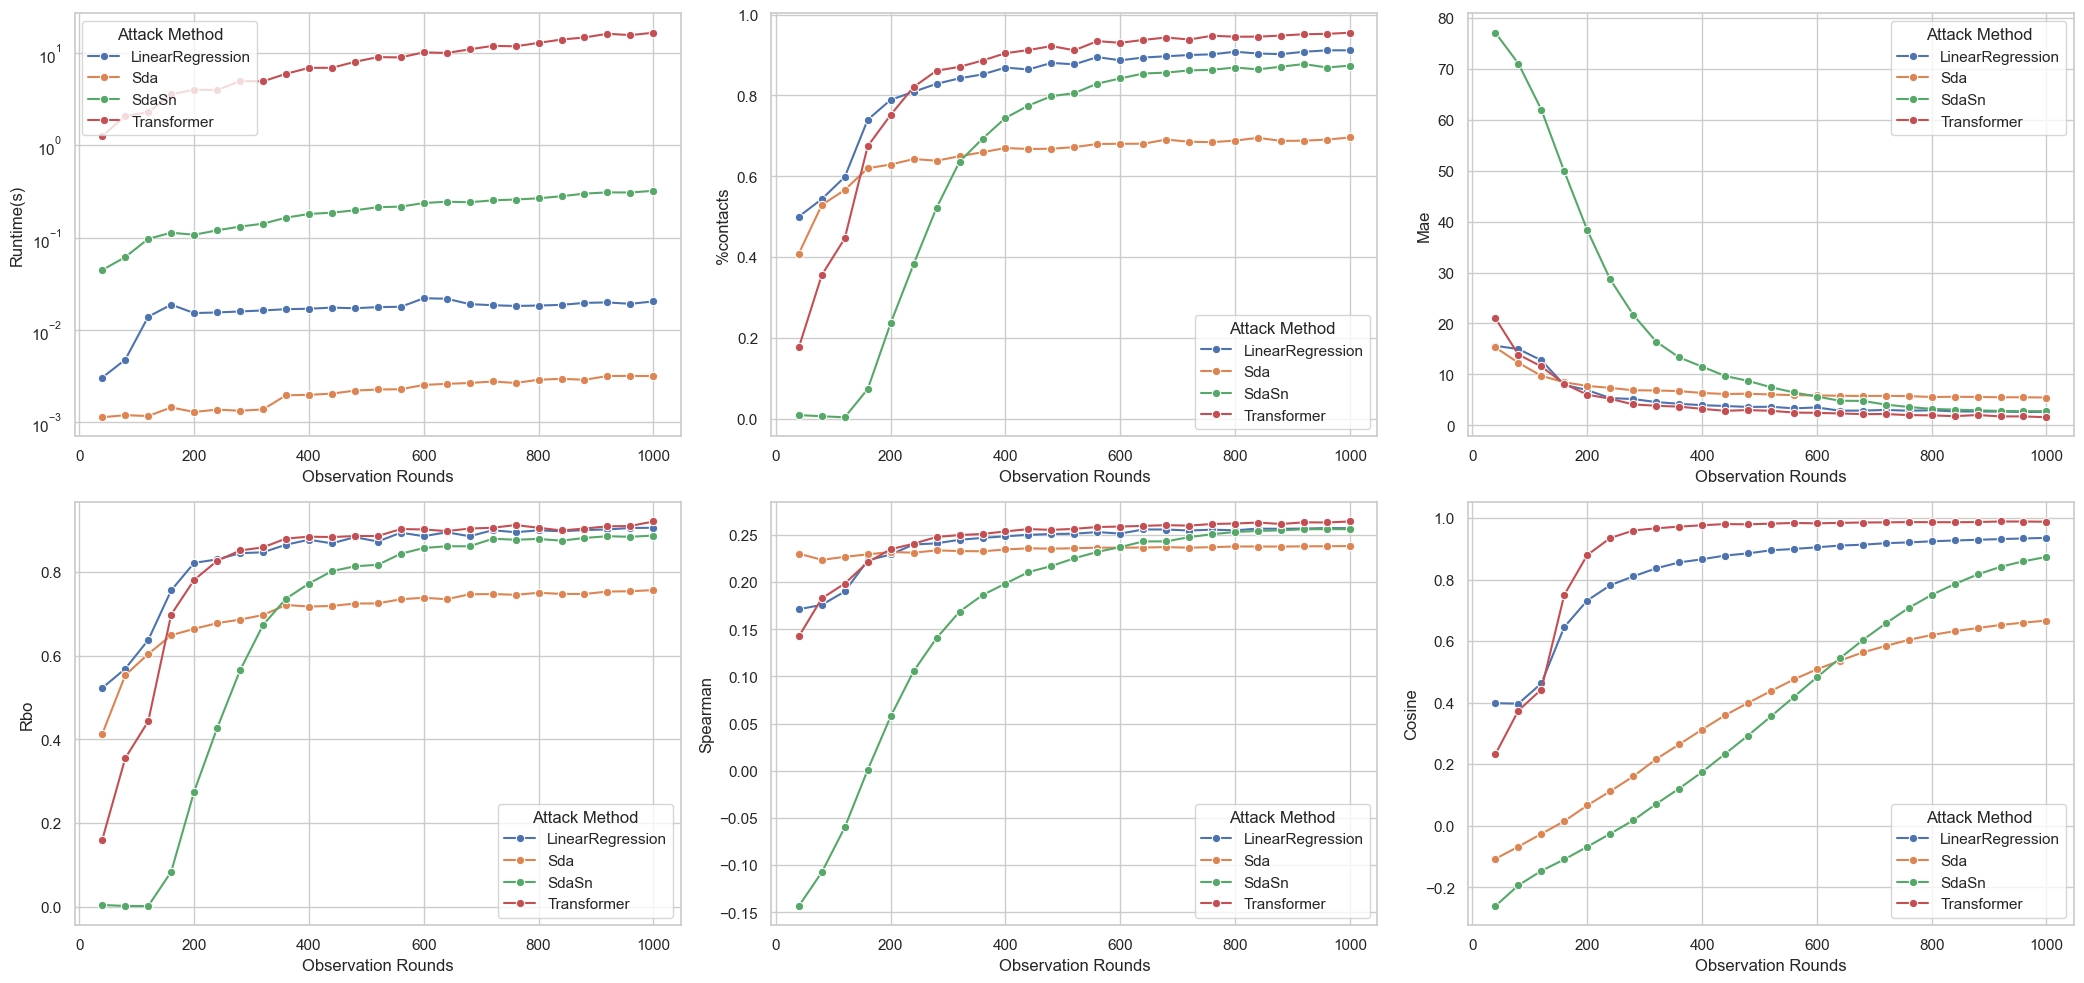

In [6]:
fig, axes = plotting.plot_evaluation_results(results_sim, logy=0)
plt.savefig('assets/simulated/evaluation.pdf')
plt.show()

### Real Instant Messaging Data

In [ ]:
real_data = chating.get_dataset('data/instant-messaging-data.pkl', most_active_months=3, n_user=N, k_contacts=K, batch_size=B, seed=seed)
P_true, X, Y = real_data
print(real_data.describe())

n_user=(100, 409), n_observations=13925, batch_size=10


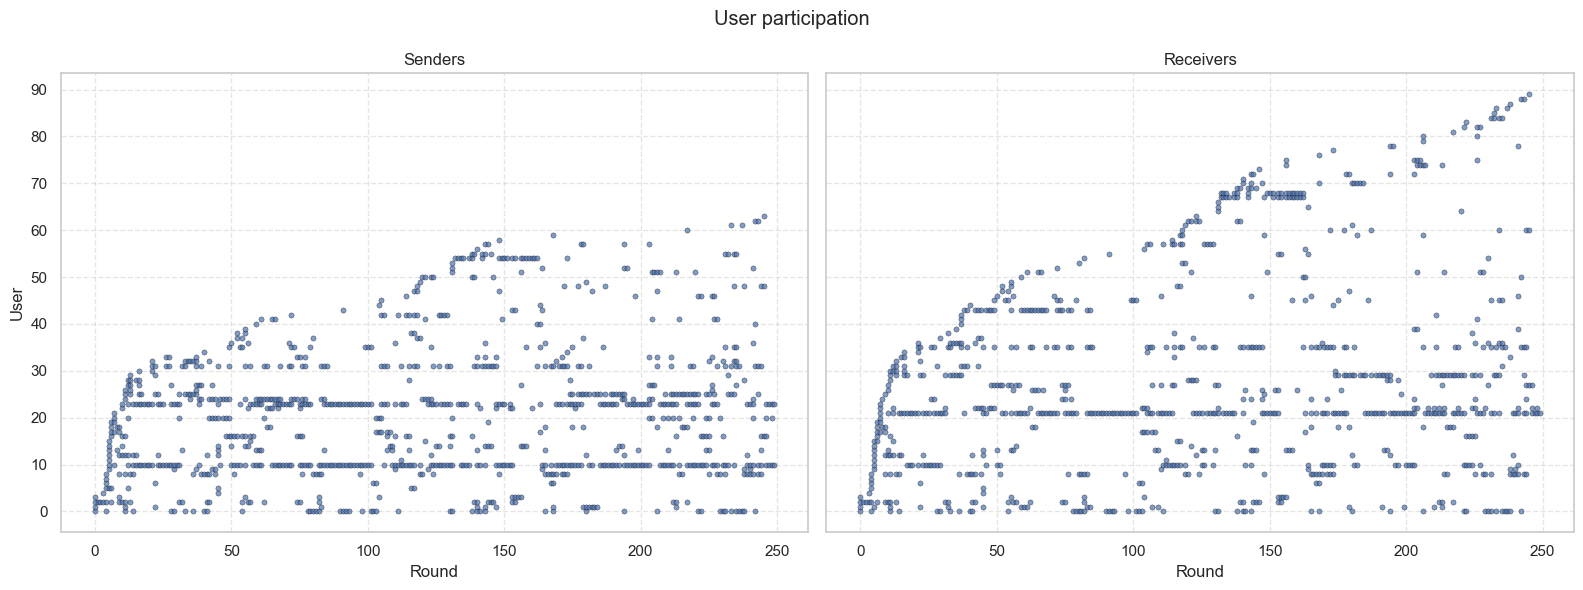

In [9]:
n_rounds = 250
fig, axs = plotting.plot_user_participation(X[:n_rounds], Y[:n_rounds])
plt.savefig('assets/real/user_participation.pdf')
plt.show()

In [10]:
# Model parameters
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(LinearRegression()),
           attack.TorchAttack(attack.Transformer(num_users=real_data.n_user),
                              train_params=torch_params)
           ]

results_real = run_experiments(real_data, attacks, step=real_data.n_observations//25, repeat=5)

Observation Rounds: 100%|██████████| 25/25 [5:19:52<00:00, 767.70s/round]   


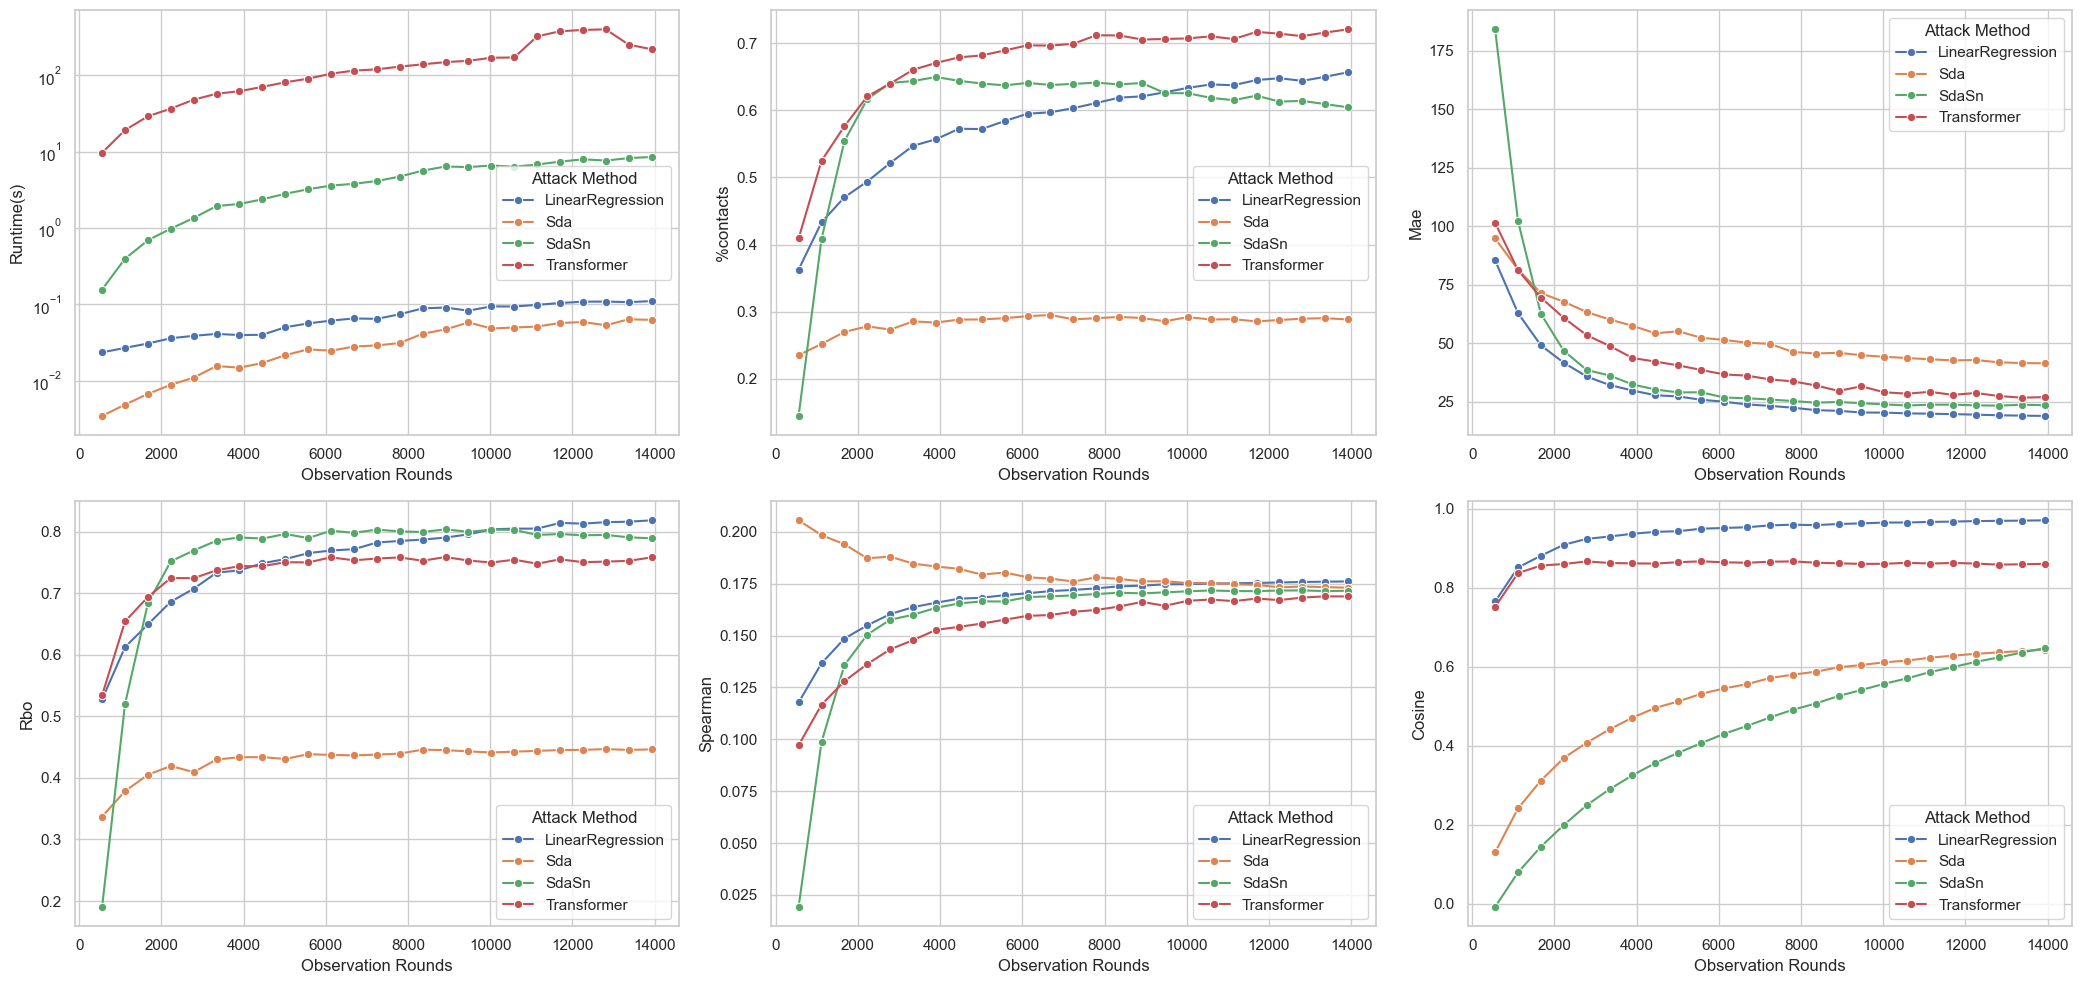

In [11]:
fig, axes = plotting.plot_evaluation_results(results_real, logy=0)
plt.savefig('assets/real/evaluation.pdf')
plt.show()